In [31]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data 
!pip install pandas==0.25

In [32]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LinearRegression
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

In [33]:
from sklearn import preprocessing
data = pd.read_csv('/content/train_data.csv')



In [34]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.00000,0,> 2 Years,Yes,40454.00000,26.00000,217,1
1,2,Male,76,1,3.00000,0,1-2 Year,No,33536.00000,26.00000,183,0
2,3,Male,47,1,28.00000,0,> 2 Years,Yes,38294.00000,26.00000,27,1
3,4,Male,21,1,11.00000,1,< 1 Year,No,28619.00000,152.00000,203,0
4,5,Female,29,1,41.00000,1,< 1 Year,No,27496.00000,152.00000,39,0


In [35]:
data.duplicated().sum()

0

In [36]:
data_op_ori = pd.read_csv('/content/test_data.csv')
data_ori = pd.read_csv('/content/train_data.csv')

In [37]:
data_op = pd.read_csv('/content/test_data.csv')

In [38]:
data['Age'] = np.log(data['Age'])
data_op['Age'] = np.log(data_op['Age'])

In [39]:
profile = ProfileReport(df = data)
profile.to_file(outputfile = 'Pre Profiling Report.html')
print('Accomplished!')

Accomplished!


In [40]:
label_encoder = preprocessing.LabelEncoder()
data["Gender"] = label_encoder.fit_transform(data["Gender"])
data["Vehicle_Age"] = label_encoder.fit_transform(data["Vehicle_Age"])
data["Vehicle_Damage"] = label_encoder.fit_transform(data["Vehicle_Damage"])


data_op["Gender"] = label_encoder.fit_transform(data_op["Gender"])
data_op["Vehicle_Age"] = label_encoder.fit_transform(data_op["Vehicle_Age"])
data_op["Vehicle_Damage"] = label_encoder.fit_transform(data_op["Vehicle_Damage"])

In [41]:
data.describe()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,300000.00000,300000.00000,300000.00000,300000.00000,300000.00000,300000.00000,300000.00000,300000.00000,300000.00000,300000.00000,300000.00000,300000.00000
mean,150000.50000,0.54058,3.58177,0.99786,26.38218,0.45795,0.51646,0.50485,30534.31212,112.11800,154.32384,0.12294
std,86602.68472,0.49835,0.39056,0.04617,13.23243,0.49823,0.57778,0.49998,17247.47589,54.14165,83.64369,0.32837
min,1.00000,0.00000,2.99573,0.00000,0.00000,0.00000,0.00000,0.00000,2630.00000,1.00000,10.00000,0.00000
25%,75000.75000,0.00000,3.21888,1.00000,15.00000,0.00000,0.00000,0.00000,24388.00000,29.00000,82.00000,0.00000
50%,150000.50000,1.00000,3.58352,1.00000,28.00000,0.00000,0.00000,1.00000,31642.00000,133.00000,154.00000,0.00000
75%,225000.25000,1.00000,3.89182,1.00000,35.00000,1.00000,1.00000,1.00000,39360.25000,152.00000,227.00000,0.00000
max,300000.00000,1.00000,4.44265,1.00000,52.00000,1.00000,2.00000,1.00000,540165.00000,163.00000,299.00000,1.00000


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 12 columns):
id                      300000 non-null int64
Gender                  300000 non-null int64
Age                     300000 non-null float64
Driving_License         300000 non-null int64
Region_Code             300000 non-null float64
Previously_Insured      300000 non-null int64
Vehicle_Age             300000 non-null int64
Vehicle_Damage          300000 non-null int64
Annual_Premium          300000 non-null float64
Policy_Sales_Channel    300000 non-null float64
Vintage                 300000 non-null int64
Response                300000 non-null int64
dtypes: float64(4), int64(8)
memory usage: 27.5 MB


In [43]:
    cor_matrix = data.corr().abs()
    #print(cor_matrix)
    
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
  
    print(); print(to_drop)


[]


In [44]:
data.drop(data[to_drop], axis=1,inplace = True)
data.drop('id', axis = 1,inplace=True)
data.drop('Region_Code', axis = 1,inplace=True)


data_op.drop(data_op[to_drop], axis=1,inplace = True)
data_op.drop('id', axis = 1,inplace=True)
data_op.drop('Region_Code', axis = 1,inplace=True)


In [45]:
data.isna().count()

Gender                  300000
Age                     300000
Driving_License         300000
Previously_Insured      300000
Vehicle_Age             300000
Vehicle_Damage          300000
Annual_Premium          300000
Policy_Sales_Channel    300000
Vintage                 300000
Response                300000
dtype: int64

In [46]:
x=pd.DataFrame(data)
x.drop("Response",axis =1,inplace=True)


In [47]:
data.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,3.78419,1,0,2,1,40454.00000,26.00000,217,1
1,1,4.33073,1,0,0,0,33536.00000,26.00000,183,0
2,1,3.85015,1,0,2,1,38294.00000,26.00000,27,1
3,1,3.04452,1,1,1,0,28619.00000,152.00000,203,0
4,0,3.36730,1,1,1,0,27496.00000,152.00000,39,0


In [48]:
data_op.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,4.20469,1,1,0,0,34821.00000,26.00000,35
1,1,3.49651,1,1,1,0,2630.00000,152.00000,88
2,1,3.29584,1,1,1,0,41244.00000,152.00000,226
3,1,4.31749,1,0,0,1,41078.00000,7.00000,202
4,1,3.71357,1,0,0,1,2630.00000,124.00000,17


In [49]:
x.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,3.78419,1,0,2,1,40454.00000,26.00000,217
1,1,4.33073,1,0,0,0,33536.00000,26.00000,183
2,1,3.85015,1,0,2,1,38294.00000,26.00000,27
3,1,3.04452,1,1,1,0,28619.00000,152.00000,203
4,0,3.36730,1,1,1,0,27496.00000,152.00000,39


In [50]:
y=data["Response"]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Response, dtype: int64

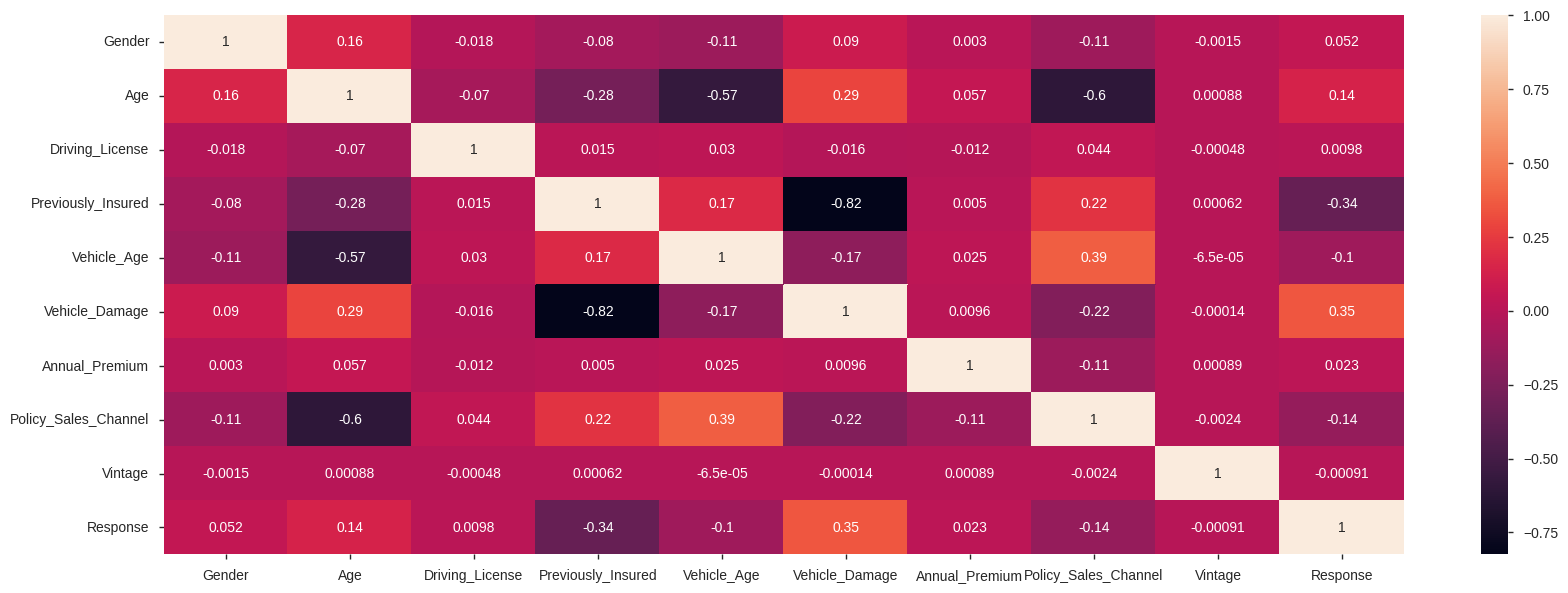

In [51]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True)

In [52]:
#sns.pairplot(data=data, diag_kind='kde')

#plt.show()

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.01, random_state = 3)


In [54]:



print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(297000, 9)
(297000,)
(3000, 9)
(3000,)


In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
#x_test = data_op
x_test = sc.transform(x_test)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

lr = DecisionTreeClassifier(max_depth = 50,criterion = "gini", max_features = 'sqrt')

#param_grid = {'max_depth': list(range(2,100))}

#lr = RandomizedSearchCV(cv, param_grid, cv= 5)


lr.fit(x_train,y_train)




DecisionTreeClassifier(max_depth=50, max_features='sqrt')

In [57]:
#print(lr.best_score_)
#print(lr.best_params_)
#print(lr.best_estimator_)

In [58]:
y_test_pred_op = lr.predict(x_test)


In [59]:
y_test_pred_op.astype('int32')
y_test_pred_op = pd.DataFrame(y_test_pred_op)

y_test_pred_op.head(2)

,0
0,0
1,0


In [60]:

op = pd.DataFrame(data_op_ori["id"])

out = [op,y_test_pred_op]

op = pd.concat(out, axis =1)

op.set_index('id')   

op[op.columns[1]] = op[op.columns[1]].astype("Int64")

op.columns =['id', 'OP']

op.head(2)


,id,OP
0,300001,0
1,300002,0


In [61]:
print(op.to_csv('/content/submission.csv', index=False, header=False))

None


In [62]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [63]:
x_test.shape

(3000, 9)

In [64]:
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix


confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                2369                 263
Actual Survived             251                 117


In [65]:
from sklearn.metrics import classification_report                   # To generate classification report


train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)
print('                    Training Report          ')
print(train_report)
print('                    Testing Report           ')
print(test_report)

                    Training Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    260487
           1       1.00      0.97      0.98     36513

    accuracy                           1.00    297000
   macro avg       1.00      0.99      0.99    297000
weighted avg       1.00      1.00      1.00    297000

                    Testing Report           
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2632
           1       0.31      0.32      0.31       368

    accuracy                           0.83      3000
   macro avg       0.61      0.61      0.61      3000
weighted avg       0.83      0.83      0.83      3000

